# 线性回归问题TensorFlow实战

## 核心步骤
1. 准备数据
2. 构建模型
3. 训练模型
4. 进行预测

## 人工数据集成

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 设置随机数种子
np.random.seed(5)

In [2]:
# 生成[-1, 1]的等差数列
x_data = np.linspace(-1, 1, 100)
# 构造 y = 2x + 1 + noise，其中，噪声的维度与x_data一致
y_data = 2*x_data + 1 + np.random.randn(*x_data.shape)*0.4

\* 把元组拆成多个实参 = np.random.randn(100)

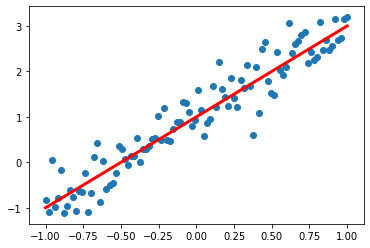

In [3]:
# 画出随机数生成的散点图
plt.scatter(x_data, y_data)
# 画出线性函数 y = 2x + 1
plt.plot(x_data, 2*x_data + 1, color = 'red', linewidth = 3)

## 构建模型
### 1. 定义占位符和模型函数

In [4]:
# 定义训练数据的占位符（输入），x是特征值，y是标签值
x = tf.placeholder('float', name = 'x')
y = tf.placeholder('float', name = 'y')

# 定义模型函数
def model(x, w, b):
    return tf.multiply(x, w) + b

### 2. 创建变量定义模型结构
* 创建用：tf.Vriable，作用是保存和更新参数
* 初始值可以是随机数、常数，或者其他变量的初始值计算得到

In [5]:
# 构建斜率变量, w
w = tf.Variable(1.0, name = 'w0')
# 构建截距变量, b
b = tf.Variable(0.0, name = 'b0')

# 构建预测函数，前向计算
pred = model(x, w, b)

## 训练模型
### 1. 设置训练参数

In [6]:
# 迭代次数（训练轮数）
train_epoch = 10
# 学习率（步长）
learning_rate = 0.05

注：步长往往是一个经验值，一般在0.01到0.1之间

### 2. 定义损失函数
* 指导收敛方向
* 常见有：均方差（Mean Square Error, MSE）和交叉墒（cross-entropy）

In [7]:
# 采用均方差，L2作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

### 3. 定义优化器
* 初始化一个GradientDescentOptimizer
* 设置学习率和优化目标：最小化损失

In [8]:
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

### 4. 创建会话
1. 声明会话
2. 变量初始化

In [9]:
# 声明会话
sess = tf.Session()
# 变量初始化
init = tf.global_variables_initializer()

sess.run(init)

### 5. 迭代训练并显示损失值
* 逐一输入，且在每一轮结束后绘制模型曲线

Train Epoch: 01 Step: 010 Loss:  0.007021904
Train Epoch: 01 Step: 020 Loss:  0.186607897
Train Epoch: 01 Step: 030 Loss:  0.024833022
Train Epoch: 01 Step: 040 Loss:  0.620799541
Train Epoch: 01 Step: 050 Loss:  0.006301077
Train Epoch: 01 Step: 060 Loss:  0.023637433
Train Epoch: 01 Step: 070 Loss:  0.354419798
Train Epoch: 01 Step: 080 Loss:  0.027936857
Train Epoch: 01 Step: 090 Loss:  0.029015331
Train Epoch: 01 Step: 100 Loss:  0.106556907
Train Epoch: 02 Step: 110 Loss:  0.179423183
Train Epoch: 02 Step: 120 Loss:  0.067458346
Train Epoch: 02 Step: 130 Loss:  0.000281519
Train Epoch: 02 Step: 140 Loss:  0.344065875
Train Epoch: 02 Step: 150 Loss:  0.021391280
Train Epoch: 02 Step: 160 Loss:  0.006406436
Train Epoch: 02 Step: 170 Loss:  0.142010629
Train Epoch: 02 Step: 180 Loss:  0.000233675
Train Epoch: 02 Step: 190 Loss:  0.094913408
Train Epoch: 02 Step: 200 Loss:  0.052370854
Train Epoch: 03 Step: 210 Loss:  0.044097763
Train Epoch: 03 Step: 220 Loss:  0.082669340
Train Epoc

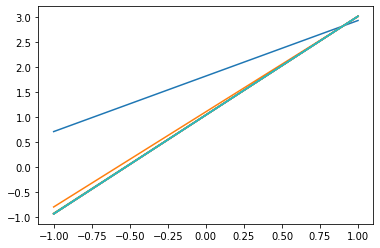

In [10]:
# 开始训练，轮数为epoch，采用SGD随机梯队下降优化方法
# 定义控制报告的粒度：display_step(非超参数，与模型训练无关，控制报告频率)
step = 0 # 记录训练步数
loss_list = [] # 保存loss值的列表
display_step = 10 # 每n轮报告一次

for epoch in range(train_epoch):
    for xs, ys in zip(x_data, y_data):
        # 打包填充数据
        _, loss = sess.run([optimizer, loss_function], feed_dict = {x: xs, y: ys})
        # 显示损失值 loss
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch: %02d' % (epoch + 1), "Step: %03d" % (step), 'Loss: ', '{:.9f}'.format(loss))
            
    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    # 画图
    plt.plot(x_data, w0temp*x_data + b0temp)

注：
* zip 组合打包，成为一个一维数组
* 等效于：for x in zip(x_data, y_data): print(x)
* 以下为展示示例

In [11]:
for xs, ys in zip(x_data, y_data):
    print(xs, ys)

-1.0 -0.8235090052459835
-0.9797979797979798 -1.0919440203535946
-0.9595959595959596 0.053116555611192884
-0.9393939393939394 -0.9796247306291097
-0.9191919191919192 -0.7945399017525654
-0.898989898989899 -0.1649873511551726
-0.8787878787878788 -1.1212687195182545
-0.8585858585858586 -0.9538263803438325
-0.8383838383838383 -0.6017263864328625
-0.8181818181818181 -0.76831161947538
-0.797979797979798 -1.0730654409283185
-0.7777777777777778 -0.6375061597905904
-0.7575757575757576 -0.6586830939520124
-0.7373737373737373 -0.23335883370367652
-0.7171717171717171 -1.1002588461321121
-0.696969696969697 -0.6740110090153746
-0.6767676767676767 0.10702105025951475
-0.6565656565656566 0.4298010897612117
-0.6363636363636364 -0.877199095802619
-0.6161616161616161 0.025615772033879103
-0.5959595959595959 -0.5841623460066405
-0.5757575757575757 -0.4942564134015874
-0.5555555555555556 -0.4598627844133726
-0.5353535353535352 -0.23971024237202823
-0.5151515151515151 0.36827290046231453
-0.494949494949494

## 结果查看
### 1. 打印结果

In [12]:
print('w: ', sess.run(w))
print('b: ', sess.run(b))

w:  1.9822965
b:  1.0420128


### 2. 结果可视化

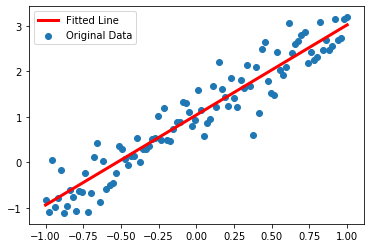

In [13]:
plt.scatter(x_data, y_data, label = 'Original Data')
plt.plot(x_data, x_data*sess.run(w) + sess.run(b), label = 'Fitted Line', color = 'r', linewidth = 3)
# 设置图例及其位置
plt.legend(loc=2)

### 3. 图形化显示损失值

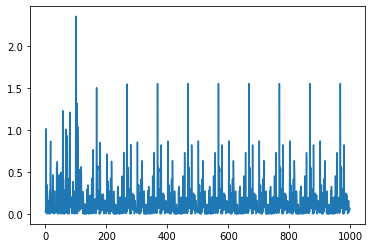

In [14]:
plt.plot(loss_list)

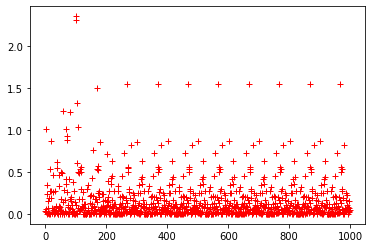

In [15]:
plt.plot(loss_list, 'r+')

## 利用模型进行预测

In [16]:
x_test = 3.21

predict = sess.run(pred, feed_dict = {x: x_test})
print('预测值：%f' % predict)

target = 2*x_test + 1.0
print('目标值：%f' % target)

预测值：7.405184
目标值：7.420000
